## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## Hypothesis

The hypothesis that I will be testing in this task is that crime has reduced over time in New South Wales. 

### 1. Importing libraries and data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [213]:
# Import data

#Importing data set RCI_offencebymonth.csv
df = pd.read_csv(r'C:\Users\Sarah\Desktop\Data Course\Task 6\02 Data\Original Data\Data for 6.4 - Sheet12.csv', index_col = False)

### 2. Data cleaning

In [214]:
#Checking column types
df.dtypes

LGA                            object
Offence category               object
Subcategory                    object
Total                           int64
Median Family Income Weekly     int64
dtype: object

In [216]:
df.columns

Index(['LGA', 'Offence category', 'Subcategory', 'Total',
       'Median Family Income Weekly'],
      dtype='object')

In [217]:
df.head(20)

,LGA,Offence category,Subcategory,Total,Median Family Income Weekly
0,Albury,Homicide,Murder *,21,1025
1,Albury,Homicide,Attempted murder,11,1025
2,Albury,Homicide,"Murder accessory, conspiracy",0,1025
3,Albury,Homicide,Manslaughter *,5,1025
4,Albury,Assault,Domestic violence related assault,6672,1025
5,Albury,Assault,Non-domestic violence related assault,10026,1025
6,Albury,Assault,Assault Police,886,1025
7,Albury,Sexual offences,Sexual assault,1403,1025
8,Albury,Sexual offences,"Sexual touching, sexual act and other sexual o...",1669,1025
9,Albury,Abduction and kidnapping,Abduction and kidnapping,69,1025


In [218]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'LGA' : 'Local Government Area', 'Subcategory': 'Crime', 'Total': 'Total Crime' }, inplace = True)

In [219]:
df.shape

(8122, 5)

In [220]:
df.columns

Index(['Local Government Area', 'Offence category', 'Crime', 'Total Crime',
       'Median Family Income Weekly'],
      dtype='object')

##### Missing values

In [221]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Local Government Area          0
Offence category               0
Crime                          0
Total Crime                    0
Median Family Income Weekly    0
dtype: int64

##### Duplicates check

In [222]:
dups = df.duplicated()

In [223]:
dups.shape # No dups

(8122,)

#### Extreme values checks

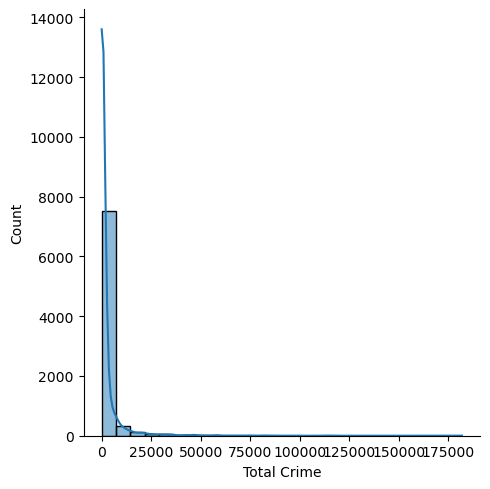

In [224]:
# Check for extreme values
sns.displot(df['Total Crime'],bins = 25, kde = True)

Note: Although there are clearly lots of lower numbers, I am going to leave them in the data because it is part of the crime data.

In [225]:
# Check the mean
df['Total Crime'].mean() 

2332.6894853484364

In [226]:
# Check the median
df['Total Crime'].median()

212.5

In [227]:
# Check the max
df['Total Crime'].max()

181879

In [228]:
# Check the min
df['Total Crime'].min()

0

### 3. Data prep for regression analysis 

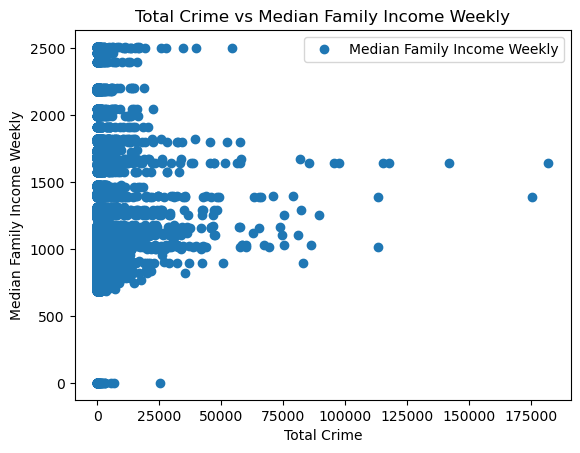

In [230]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total Crime', y='Median Family Income Weekly',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Crime vs Median Family Income Weekly')  
plt.xlabel('Total Crime')  
plt.ylabel('Median Family Income Weekly')  
plt.show()

In [231]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Total Crime'].values.reshape(-1,1)
y = df['Median Family Income Weekly'].values.reshape(-1,1)

In [232]:
X

array([[  21],
       [  11],
       [   0],
       ...,
       [1075],
       [   3],
       [3037]], dtype=int64)

In [233]:
y

array([[1025],
       [1025],
       [1025],
       ...,
       [   0],
       [   0],
       [   0]], dtype=int64)

In [234]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Hypothesis

The lower the median weekly family wage, the higher the crime rate.

### 4. Regression analysis

In [235]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [236]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [237]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

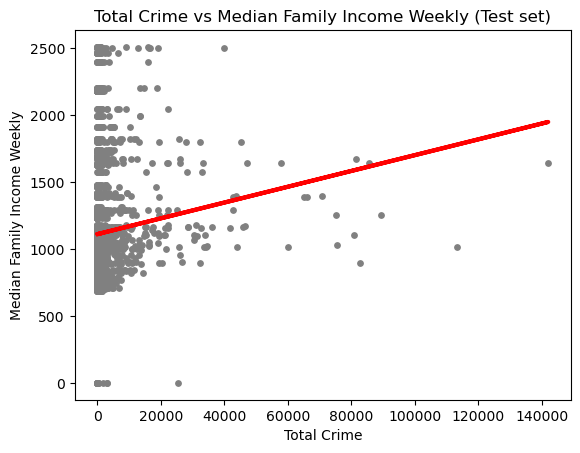

In [238]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Crime vs Median Family Income Weekly (Test set)')
plot_test.xlabel('Total Crime')
plot_test.ylabel('Median Family Income Weekly')
plot_test.show()

In [239]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [240]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00589767]]
Mean squared error:  179653.82833320872
R2 score:  0.010849318923548568


### Intepretation:

The slope is positive, so in theory the relationship is positive. This does not fit my hypothesis that the higher median weekly family income, the higher the crime. The mean squared error is high at 179653 , so the regression line is not a good representation of the data. Also, the R2 score of 0.01 represents very bad fit.

In [250]:
y_predicted

array([[1115.16312992],
       [1112.78047269],
       [1138.19351724],
       ...,
       [1110.43320146],
       [1113.86564331],
       [1111.07014943]])

In [251]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,848,1115.163130
1,895,1112.780473
2,1142,1138.193517
3,786,1111.282465
4,1092,1110.309350
5,981,1120.866173
6,1018,1154.978276
7,1126,1110.315248
8,1096,1110.492178
9,2181,1110.332941


##### Compare how the regression fits the training set

In [252]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [253]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [254]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00589767]]
Mean squared error:  180976.93640257098
R2 score:  0.011781199267450693


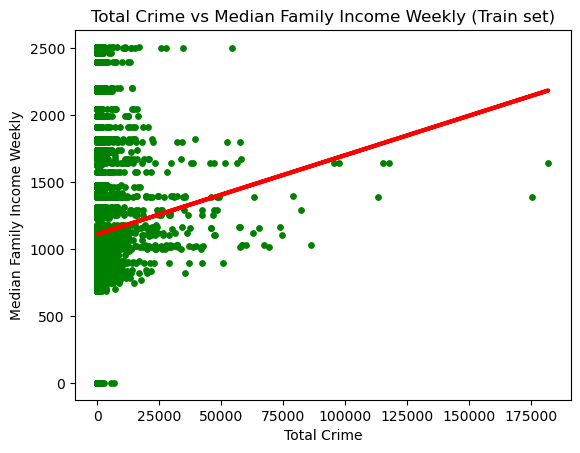

In [246]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Crime vs Median Family Income Weekly (Train set)')
plot_test.xlabel('Total Crime')
plot_test.ylabel('Median Family Income Weekly')
plot_test.show()

### Reflections

The values in the trained set are the same as in the test set. They both have a positive relationship, a high mean square error and a low R2 score. This shows that low wages are not an indication of what the crime rate will be. You can see though, that the places that have more crime do come under the positive line, so then have a lower weekly wage. 

I do not think that the model performed well because of the data. 

### Bonus: performance improvement after removing outliers

In [259]:
# Clean the extreme values from the "Total Crime" variable observed during the consistency checks.

df_test = df[df['Total Crime'] >=20000]

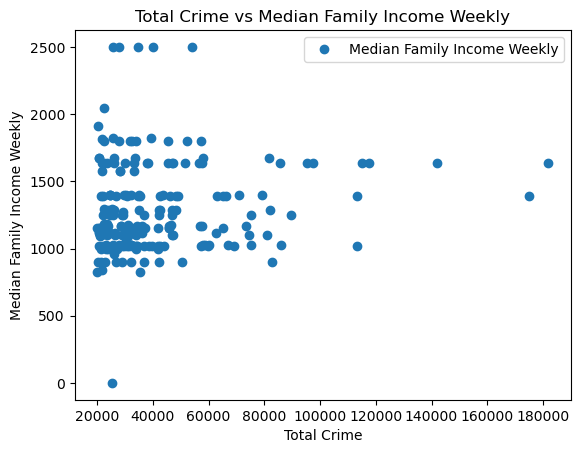

In [260]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Total Crime', y='Median Family Income Weekly', style='o')  
plt.title('Total Crime vs Median Family Income Weekly')  
plt.xlabel('Total Crime')  
plt.ylabel('Median Family Income Weekly')  
plt.show()

In [261]:
# Reshape again.

X_2 = df_test['Total Crime'].values.reshape(-1,1)
y_2 = df_test['Median Family Income Weekly'].values.reshape(-1,1)

In [262]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [263]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [264]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [265]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [266]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00156403]]
Mean squared error:  149862.97285118006
R2 score:  0.0019060004726552116


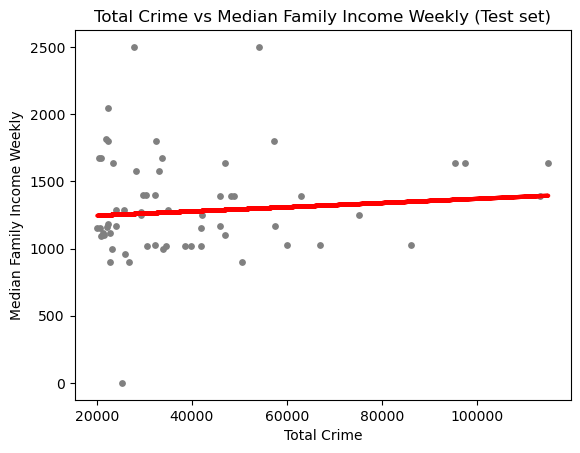

In [267]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Total Crime vs Median Family Income Weekly (Test set)')
plot_test.xlabel('Total Crime')
plot_test.ylabel('Median Family Income Weekly')
plot_test.show()

In [268]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,1388,1390.240604
1,1029,1347.592682
2,1817,1247.219608
3,1029,1306.890412
4,896,1248.666334
5,1800,1263.771719
6,996,1265.934770
7,1165,1303.030391
8,1388,1284.950225
9,1577,1257.212184
